In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Getting Started with Images

cv2.imread() - to read an image.

First argument path to the image. Second argument is a **flag**:
>cv2.IMREAD_COLOR - load a color image (1)
>cv2.IMREAD_GRAYSCALE- load a grayscale image (0)
>cv2.IMREAD_UNCHANGED - load image as such including alpha channel(-1)

In [6]:
img = cv2.imread('images/tiger.jpg', 0)
#load in gray scale

#####  Display an image

cv2.imshow() - display an image in the window. We can create as many windows as we wish with a different window names.

In [7]:
cv2.imshow('tiger image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey is a keyboard binding function. Its argument is the time in milliseconds. If 0 is passed, it waits indefinitely for a key stroke.

cv2.destroyAllWindows() - destroys all windows we created.

cv2.destroyWindow() to destroy a spect window by passing the window name.

In [9]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL) #for resizable windows
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
cv2.imshow('image', img)
k = cv2.waitKey(0) & 0xff #for 64 bit images
if k==ord('s'):
    cv2.imwrite('output/write.png', img)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()

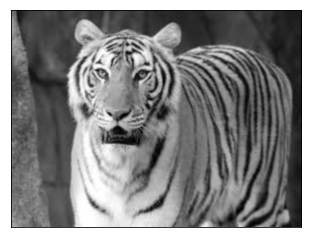

In [25]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([])
plt.yticks([]);

> Color Image loaded by OpenCV is in BGR mode

##### Loading a color image in Opencv is plotting it in Matplotlib

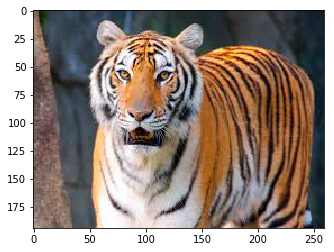

In [32]:
img = cv2.imread('images/tiger.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Getting Started with Videos

In [41]:
cap = cv2.VideoCapture(1)

while True:
    #Capture frame by frame
    _, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q') & 0xff:
        break

cap.release()
cv2.destroyAllWindows()
    

Sometimes cap may not have initialized the capture. In that case this code shows error. You can check whether it is initialized or not using the **cap.isOpened()** method. Open it using **cap.open()**

Can access features of the video using **cap.get(propId)**. PropId in [0, 18] Each number denotes a property of the video. Set values of the properties using **cap.set(propId, value)**

Playing video form file is same as capturing from Camera, just change camera index with video file name. Also while displaying the frame, use appropriate time for cv2.waitKey(). If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.

###### Saving a Video

We need a **VideoWriter** object

1. Specify output file name.
2. Specify FourCC code. 4-byte code to specify video codec. (MJPG, X264(gives very small size video), XVID, DIVX, WMV1)
3. Then frames per second.
4. isColor flag. If True, encoder expects a color frame else a gray scale frame.

>FourCC code is passed as cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG) for MJPG.

In [45]:
cap = cv2.VideoCapture(1)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
#*XVID equivalent to ('X', 'V', 'I', 'D')

out = cv2.VideoWriter('output/output.avi', fourcc, 20.0, (640, 480))

while True:
    ret, frame = cap.read()
    if ret==False:
        break
    out.write(frame)
    cv2.imshow('frmae', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()
    

### Drawing Functions in OpenCV

Common arguments:

- img: The Image where you want to draw the shape
- color: Color of the shape. For BGR- (255,0, 0) is blue. For gray pass scalar value
- thickness: if -1 passed, it fill the shape
- lineType: Type of line

In [64]:
img = np.zeros((512, 512, 3), np.uint8)

#starting coordinates and ending coordinates are passed for a line
cv2.line(img, (0, 0), (501, 501), (255, 0, 0), 2);
cv2.imshow('Frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

cv2.rectangle(img, (384, 28), (500, 128), (0, 255, 0), 3)
cv2.imshow('Frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

#centre coordinates and radius is passed
cv2.circle(img, (450, 300), 40, (0, 0, 255), -1)
cv2.imshow('Frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

##### Drawing Polygon
To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32.

In [65]:
points = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
points = points. reshape((-1, 1, 2))
cv2.polylines(img, [points], True, (0, 255, 255))
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

Note If third argument is False, you will get a polylines joining all the points, not a closed shape.

##### Adding Text to Images:
To put texts in images, you need specify following things.
- Text data that you want to write
- Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
- Font type (Check cv2.putText() docs for supported fonts)
- Font Scale (specifies the size of font)
- regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is recommended.

In [69]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img , 'OPEN CV', (10, 500), font, 2, (255, 255, 255), 2, cv2.LINE_AA)
cv2.imshow('frame', img)
if cv2.waitKey(0) & 0xff == ord('q'):
    cv2.destroyAllWindows()

### Mouse as a Paint-Brush

Mouse callback function- which is executed when a mouse event takes place. Mouse event can be left-button down, left-button down, double-click etc - anything related to the mouse. 

To list all the events do the following

In [70]:
[i for i in dir(cv2) if 'EVENT' in i]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function does

In [73]:
# This function will draw a circle wherever we click it.

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)

img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image') #create a window first and resize it later
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xff == ord('q'):
        break
cv2.destroyAllWindows()

In [82]:
drawing = False
mode = True 

ix, iy = -1, -1

def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
        
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0 ,255), -1)  

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == ord('q'):
        break

cv2.destroyAllWindows()

##### Trackbar as Color Palette

For **cv2.getTrackbarPos()** function, first argument is the trackbar name, second one is the window name to which it is attached, third argument is the default value, fourth one is the maximum value and fifth one is the callback function which is executed everytime trackbar value changes. The callback function always has a default argument which is the trackbar position. In our case, function does nothing, so we simply pass.

Another important application of trackbar is to use it as a button or switch. OpenCV, by default, doesn’t have button functionality. So you can use trackbar to get such functionality. In our application, we have created one switch in which application works only if switch is ON, otherwise screen is always black.

In [84]:
def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0, 255, nothing)
cv2.createTrackbar('G','image',0, 255, nothing)
cv2.createTrackbar('B','image',0, 255, nothing)

switch = '0: OFF \n1: ON'
cv2.createTrackbar(switch, 'image',0, 1, nothing)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
    
    
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()   

In [104]:
def draw_circle(event, x, y, flags, param):
    global radius,r, g, b, drawing
    
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('button down')
        drawing = True
        
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
#             print('mouse move')
            cv2.circle(img, (x, y), 5, (0, 0 ,255), -1) 
        
    elif event == cv2.EVENT_LBUTTONUP:
        print('button up')
        drawing = False
        cv2.circle(img, (x, y), 5, (0, 0 ,255), -1) 
        
img = np.zeros((300, 512, 3), np.uint8)
drawing = False
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0, 255, nothing)
cv2.createTrackbar('G','image',0, 255, nothing)
cv2.createTrackbar('B','image',0, 255, nothing)
cv2.createTrackbar('radius','image',1, 10, nothing)

switch = '0: OFF \n1: ON'
cv2.createTrackbar(switch, 'image',0, 1, nothing)        
cv2.setMouseCallback('image', draw_circle)

while(1):
    
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
        
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    radius = cv2.getTrackbarPos('radius', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()   

button down
button up
button down
button up
button down
button up
button up
button down
button up
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button down
button up
button up
